# New York City Airbnb Open Data Classification Model

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

**Loading the dataset**

In [2]:
df=pd.read_csv('C:/Users/nanth/OneDrive/Desktop/NewYorkCityOpenSource.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Exploratory Data Analysis**

In [3]:
#describing the dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#checking the null values percentage
df.isnull().sum()/len(df)*100


id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [6]:
#removing the null values
df = df.fillna(df['last_review'].mode())
df = df.fillna(df['name'].mode())
df = df.fillna(df['host_id'].mode())
df = df.fillna(df['reviews_per_month'].mean())

In [7]:
df.isnull().sum()/len(df)*100

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [8]:
#checking the column name
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
#check the numerical column and categorical column 
cat = []
num = []
for i in df.columns:
    if df[i].dtypes=='O':
            cat.append(i)
    else:
        num.append(i)
print('The numerical columns are',num)
print('The catagorical columns are',cat)

The numerical columns are ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
The catagorical columns are ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [10]:
#drop the column
df.drop(['name', 'host_name', 'last_review'], axis=1, inplace=True)

In [11]:
#let's proceed with examing some interesting categorical unique values

In [12]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
len(df.neighbourhood.unique())

221

In [14]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
#room type and neighbourhood_group based on price
t= df.groupby(['room_type','neighbourhood_group']).max('price') 
t

id    host_id  latitude  longitude  \
room_type       neighbourhood_group                                             
Entire home/apt Bronx                36442252  273841667  40.90527  -73.78414   
                Brooklyn             36483152  273849259  40.73890  -73.85676   
                Manhattan            36485431  274311461  40.87665  -73.90855   
                Queens               36472710  274225617  40.79721  -73.71690   
                Staten Island        36310353  271528362  40.64779  -74.06092   
Private room    Bronx                36435986  273877318  40.91306  -73.78158   
                Brooklyn             36485057  274307600  40.73861  -73.85899   
                Manhattan            36487245  274321313  40.87663  -73.90982   
                Queens               36484363  274040642  40.79511  -73.71299   
                Staten Island        36438336  272557707  40.64579  -74.06208   
Shared room     Bronx                36379669  272247972  40.89785  -73.82949   
                Brooklyn             36473253  271336460  40.73470  -73.87077   
                Manhattan            36485609  272477673  40.86931  -73.91682   
                Queens               36399640  271925782  40.77971  -73.71928   
                Staten Island        36202006  158178970  40.63136  -74.07830   

                                     price  minimum_nights  number_of_reviews  \
room_type       neighbourhood_group                                             
Entire home/apt Bronx                 1000             186                271   
                Brooklyn             10000             500                488   
                Manhattan            10000            1250                447   
                Queens                2600             500                441   
                Staten Island         5000             365                242   
Private room    Bronx                 2500             365                321   
                Brooklyn              7500             999                480   
                Manhattan             9999             365                607   
                Queens               10000             365                629   
                Staten Island          300              33                333   
Shared room     Bronx                  800              90                116   
                Brooklyn               725             100                236   
                Manhattan             1000             999                229   
                Queens                1800              62                454   
                Staten Island          150               4                  9   

                                     reviews_per_month  \
room_type       neighbourhood_group                      
Entire home/apt Bronx                            10.34   
                Brooklyn                         13.33   
                Manhattan                        14.00   
                Queens                           15.78   
                Staten Island                     9.10   
Private room    Bronx                             8.37   
                Brooklyn                         14.00   
                Manhattan                        58.50   
                Queens                           20.94   
                Staten Island                    10.12   
Shared room     Bronx                             6.82   
                Brooklyn                          6.54   
                Manhattan                        10.77   
                Queens                           10.60   
                Staten Island                     5.51   

                                     calculated_host_listings_count  \
room_type       neighbourhood_group                                   
Entire home/apt Bronx                                            13   
                Brooklyn                                        232   
                

In [16]:
#checking the outlier using boxplot

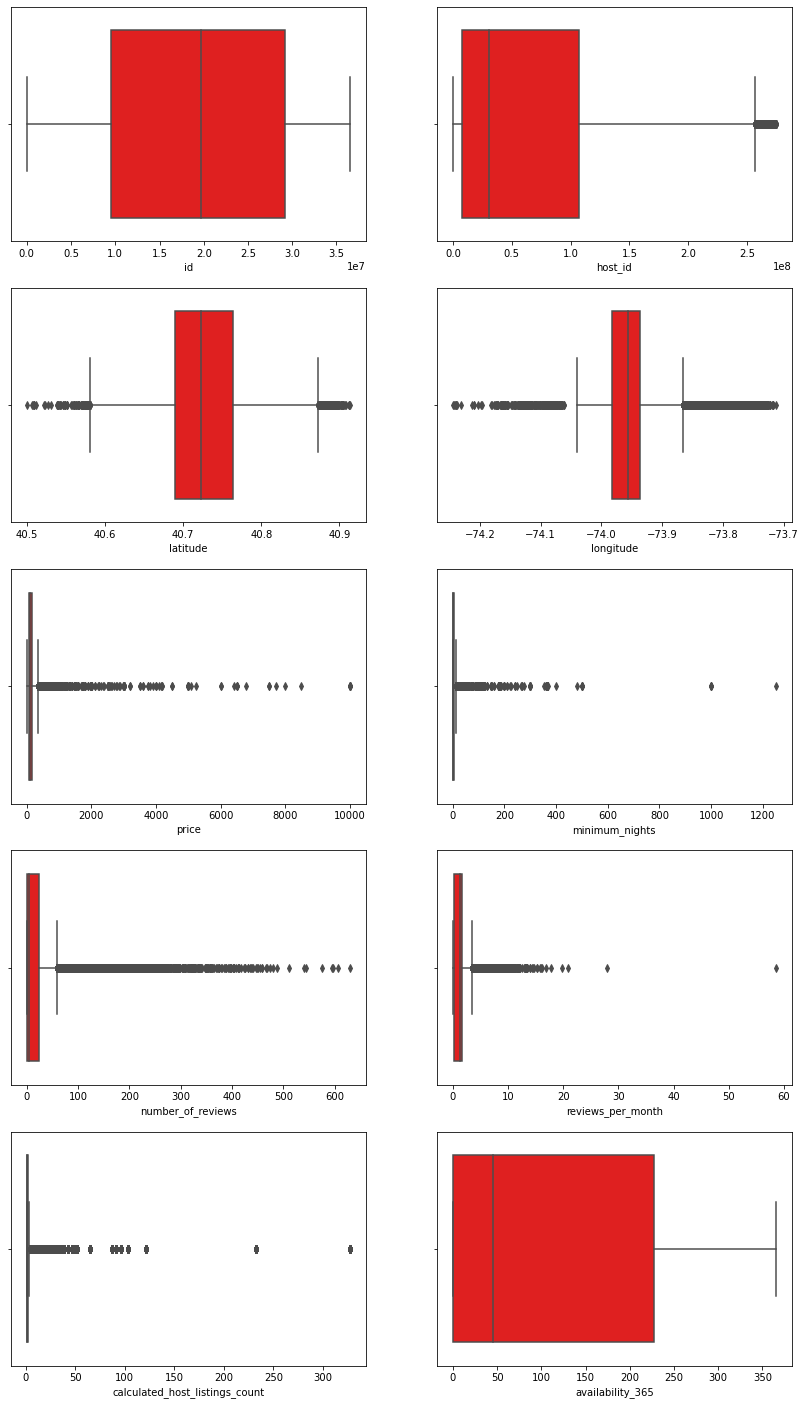

In [17]:
plt.figure(figsize=(14,25))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(5,2,j)
    sns.boxplot(df[i],color='red')
plt.show()

we can see in the boxplot most of the outliers are in the dataset are presented in minimum_nights and price.

In [18]:
#checking the skewness
df[num].skew()

id                                -0.090257
host_id                            1.206214
latitude                           0.237167
longitude                          1.284210
price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.511906
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: float64

minimum_nights column is so skewed than any other, usual skewness value should be -1 to 1

In [19]:
#outlier detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
10,5295,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,0.430000,1,6
19,7750,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,1.373221,2,249


The outliers are detected check the skew.

In [20]:
df.skew().sort_values(ascending=False)

calculated_host_listings_count    2.110815
number_of_reviews                 1.789081
availability_365                  1.700359
host_id                           1.563883
minimum_nights                    1.350530
reviews_per_month                 0.997061
price                             0.891539
latitude                          0.400434
longitude                         0.228587
id                                0.008010
dtype: float64

Still the skewness is high in calculated_host_listing_count.In this case use normalization technique

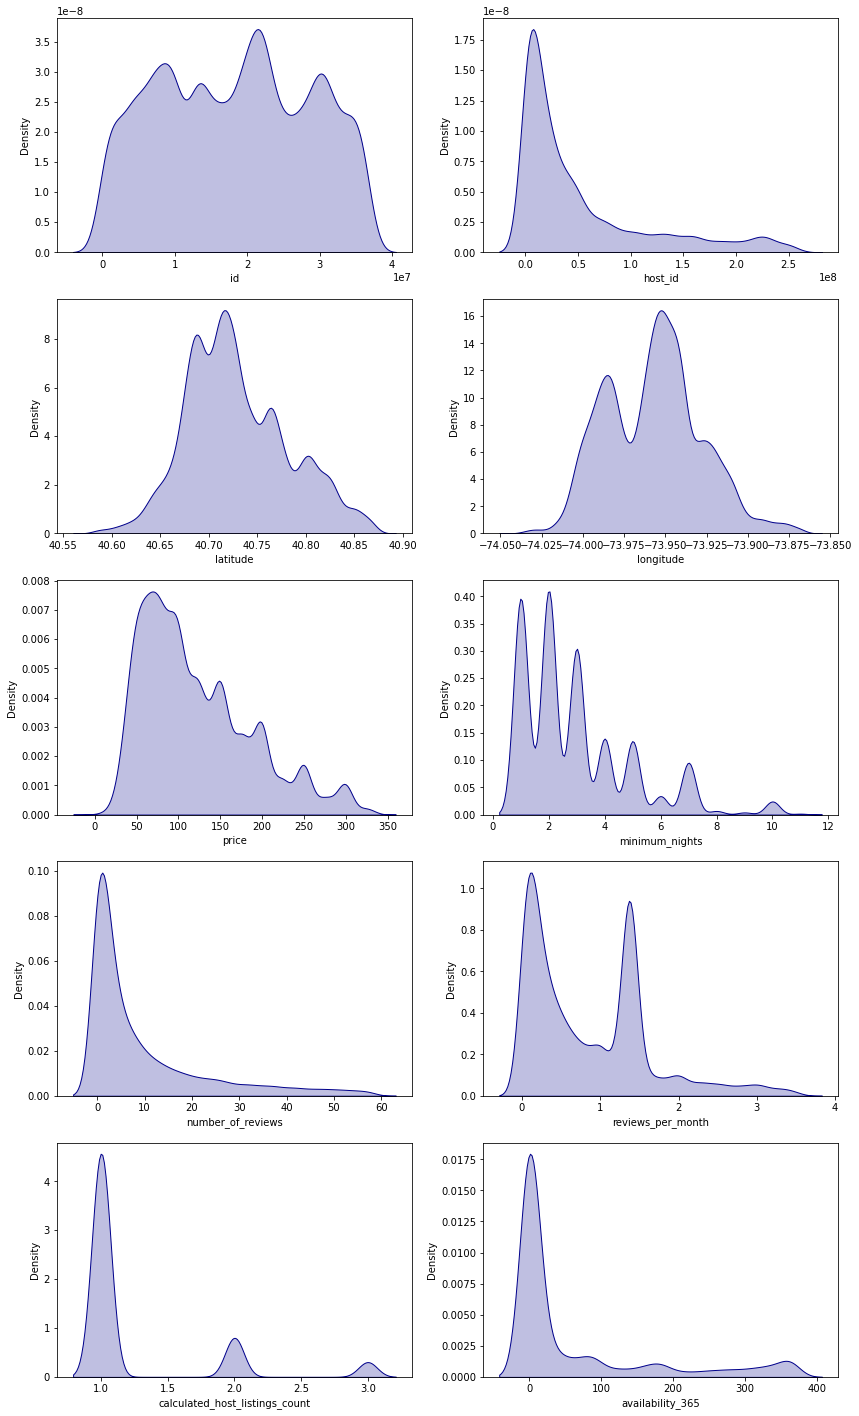

In [21]:
 # kdeplot to check the normalization before removing the outliers

plt.figure(figsize=(14,25))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(5,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()


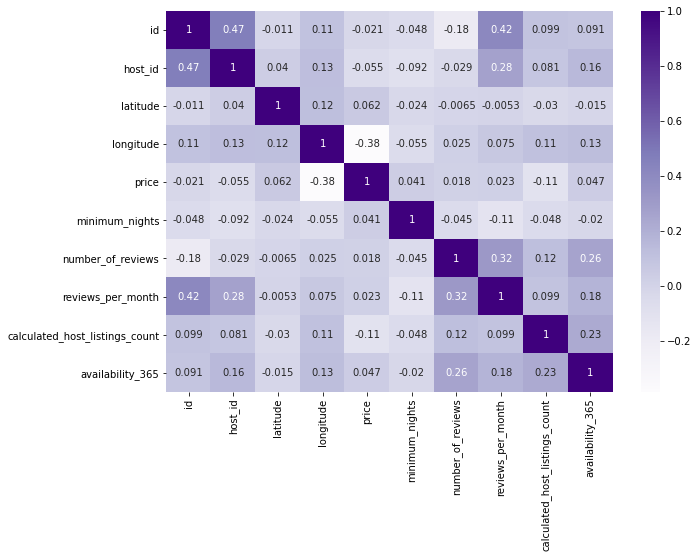

In [22]:
# Heatmap diagram
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap="Purples")
plt.show()


**Feature Engineering**

In [23]:
#Feature Encoding

In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le =preprocessing.LabelEncoder()
df.select_dtypes(object)


,neighbourhood_group,neighbourhood,room_type
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
4,Manhattan,East Harlem,Entire home/apt
10,Manhattan,Upper West Side,Entire home/apt
19,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48887,Brooklyn,Williamsburg,Entire home/apt
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt


In [25]:
le = preprocessing.LabelEncoder()
le.fit(df['neighbourhood_group'])    
df['neighbourhood_group']=le.transform(df['neighbourhood_group'])

le = preprocessing.LabelEncoder()
le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])


In [26]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,2845,2,73,40.75362,-73.98377,0,225,1,45,0.380000,2,355
2,3647,4632,2,56,40.80902,-73.94190,1,150,3,0,1.373221,1,365
4,5022,7192,2,38,40.79851,-73.94399,0,80,10,9,0.100000,1,0
10,5295,7702,2,109,40.80316,-73.96545,0,135,5,53,0.430000,1,6
19,7750,17985,2,38,40.79685,-73.94872,0,190,7,0,1.373221,2,249


In [27]:
x = df.drop('room_type',1)
y = df['room_type']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
#normalization technique

In [31]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
# transform training data
X_train_norm = norm.transform(xtrain)
# transform testing data
X_test_norm = norm.transform(xtest)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [33]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()


In [34]:
#logistic regression classifier

In [35]:
lr.fit(X_train_norm,ytrain)
lr.predict(X_test_norm)
lr.score(X_test_norm,ytest)

0.8240295748613679

In [37]:
lr.fit(X_train_norm,ytrain)
ypred = lr.predict(X_test_norm)
accuracy_score(ypred,ytest)


0.8240295748613679

In [38]:
print('classification report: \n',classification_report(ytest,ypred))


classification report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      4110
           1       0.79      0.87      0.83      3864
           2       0.00      0.00      0.00       141

    accuracy                           0.82      8115
   macro avg       0.55      0.56      0.55      8115
weighted avg       0.81      0.82      0.82      8115



In [39]:
# decision tree classifier

In [40]:
dt.fit(X_train_norm,ytrain)
dt.predict(X_test_norm)
dt.score(X_test_norm,ytest)


0.7572396796056685

In [41]:
dt.fit(X_train_norm,ytrain)
ypred = dt.predict(X_test_norm)
accuracy_score(ypred,ytest)


0.7576093653727665

In [42]:
print('classification report: \n',classification_report(ytest,ypred))


classification report: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      4110
           1       0.75      0.76      0.76      3864
           2       0.12      0.15      0.13       141

    accuracy                           0.76      8115
   macro avg       0.55      0.56      0.56      8115
weighted avg       0.76      0.76      0.76      8115



In [43]:
#random forest classifier

In [44]:
rn.fit(X_train_norm,ytrain)
rn.predict(X_test_norm)
rn.score(X_test_norm,ytest)


0.8431300061614294

In [45]:
rn.fit(X_train_norm,ytrain)
ypred = rn.predict(X_test_norm)
accuracy_score(ypred,ytest)


0.840788662969809

In [46]:
print('classification report: \n',classification_report(ytest,ypred))

classification report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      4110
           1       0.83      0.84      0.84      3864
           2       0.91      0.07      0.13       141

    accuracy                           0.84      8115
   macro avg       0.86      0.59      0.61      8115
weighted avg       0.84      0.84      0.83      8115



In [47]:
# K Nearest Neighbor

In [48]:
knn.fit(X_train_norm,ytrain)
knn.predict(X_test_norm)
knn.score(X_test_norm,ytest)


0.7757239679605669

In [49]:
knn.fit(X_train_norm,ytrain)
ypred = knn.predict(X_test_norm)
accuracy_score(ypred,ytest)


0.7757239679605669

In [50]:
print('classification report: \n',classification_report(ytest,ypred))

classification report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      4110
           1       0.75      0.79      0.77      3864
           2       0.50      0.02      0.04       141

    accuracy                           0.78      8115
   macro avg       0.68      0.53      0.54      8115
weighted avg       0.77      0.78      0.77      8115



In [51]:
#Gaussian Naive Bayes 

In [52]:
gb.fit(X_train_norm,ytrain)
gb.predict(X_test_norm)
gb.score(X_test_norm,ytest)


0.7626617375231054

In [53]:
gb.fit(X_train_norm,ytrain)
ypred = gb.predict(X_test_norm)
accuracy_score(ypred,ytest)


0.7626617375231054

In [54]:
print('classification report: \n',classification_report(ytest,ypred))

classification report: 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      4110
           1       0.73      0.81      0.77      3864
           2       0.13      0.05      0.07       141

    accuracy                           0.76      8115
   macro avg       0.56      0.53      0.54      8115
weighted avg       0.76      0.76      0.76      8115



In [55]:
#Stochastic Gradient Descent

In [56]:
sgd.fit(X_train_norm,ytrain)
sgd.predict(X_test_norm)
sgd.score(X_test_norm,ytest)


0.825754775107825

In [57]:
sgd.fit(X_train_norm,ytrain)
ypred = sgd.predict(X_test_norm)
accuracy_score(ypred,ytest)


0.8251386321626617

In [58]:
print('classification report: \n',classification_report(ytest,ypred))

classification report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      4110
           1       0.79      0.86      0.83      3864
           2       0.00      0.00      0.00       141

    accuracy                           0.83      8115
   macro avg       0.55      0.56      0.55      8115
weighted avg       0.81      0.83      0.82      8115



In [59]:
# All alogrithums in classification model that are used above


In [62]:
li = [lr,rn,dt,knn,gb,sgd]                   
for i in li: 
    print(i)
    i.fit(X_train_norm,ytrain)
    i.predict(xtest)
    print('accuracy:',i.score(X_test_norm,ytest))
    if i==sgd:
        continue
    print('*'*29)


LogisticRegression()
accuracy: 0.8240295748613679
*****************************
RandomForestClassifier()
accuracy: 0.841158348736907
*****************************
DecisionTreeClassifier()
accuracy: 0.7594577942082563
*****************************
KNeighborsClassifier()
accuracy: 0.7757239679605669
*****************************
GaussianNB()
accuracy: 0.7626617375231054
*****************************
SGDClassifier()
accuracy: 0.8242760320394331


In [65]:
li = [lr,rn,dt,knn,gb,sgd]                         
di = {}
for i in li:
    i.fit(X_train_norm,ytrain)
    ypred = i.predict(X_test_norm)
    print(i,":",accuracy_score(ypred,ytest),'\n')
    di.update({str(i):i.score(X_test_norm,ytest)})
    print('Classification report: \n',classification_report(ytest,ypred))
    if i==sgd:
        continue
    print('*'*55)


LogisticRegression() : 0.8240295748613679 

Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      4110
           1       0.79      0.87      0.83      3864
           2       0.00      0.00      0.00       141

    accuracy                           0.82      8115
   macro avg       0.55      0.56      0.55      8115
weighted avg       0.81      0.82      0.82      8115

*******************************************************
RandomForestClassifier() : 0.8441158348736907 

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      4110
           1       0.84      0.84      0.84      3864
           2       0.90      0.06      0.12       141

    accuracy                           0.84      8115
   macro avg       0.86      0.59      0.61      8115
weighted avg       0.84      0.84      0.84      8115

****************************************

In [66]:
# I have also created a plot for reference based on prediction value and algorithms used above


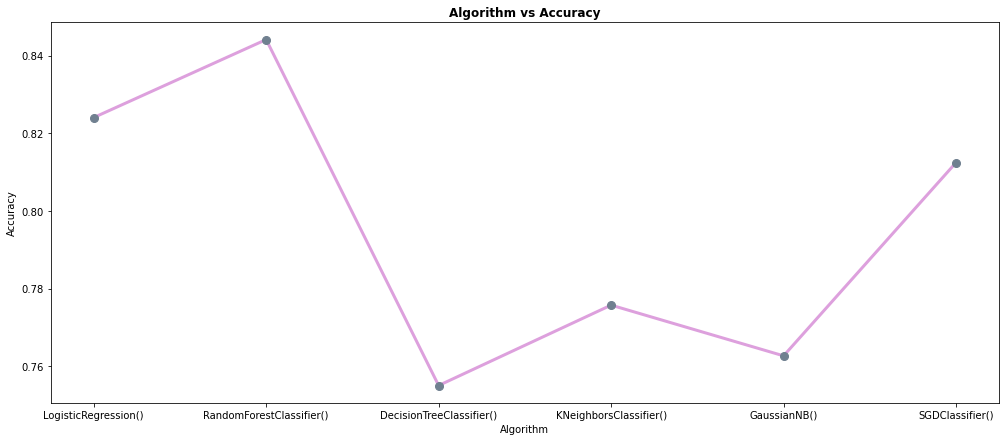

In [70]:
plt.figure(figsize=(17, 7))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm",)
plt.ylabel("Accuracy")
plt.plot(di.keys(),di.values(),marker='o',color='plum',linewidth=3,markersize=8,
         markerfacecolor='slategray',markeredgecolor='slategray')
plt.show()

As we can see from above graph the base ML algorithm(Decision Tree) accuracy is 75% and highest ML alogrithm (Random forest) accuracy is 84%